# Filtracja bilateralna

## Konwolucja obrazu z filtrem o zadanych współczynnikach

Splot (konwolucję) obrazu wejściowego $I$ z filtrem $\psi$ dla ustalonego punktu obrazu $\mathbf{x}$ można przedstawić następująco:

\begin{equation}
\hat{I}(\mathbf{x}) = \frac{1}{W_N}\sum_{\mathbf{p} \in \eta(\mathbf{x})} \psi(||\mathbf{p}-\mathbf{x}||)I(\mathbf{p})
\tag{1}
\end{equation}

gdzie:
- $\hat{I}$ jest obrazem wynikowym (przefiltrowanym),
- $W_N = \sum_y \psi(y)$ jest parametrem normalizującym współczynniki filtra $\psi$,
- $||\cdot||$ jest odległością między punktami obrazu $\mathbf{x}$ i $\mathbf{p}$ według ustalonej metryki (np. norma $L_2$). Uwaga, proszę pamiętać, że zarówno $\mathbf{x}$, jak i $\mathbf{p}$ to współrzędne przestrzenne,
- $\eta(\mathbf{x})$ jest otoczeniem punktu $\mathbf{x}$.

Funkcja $\psi$ decyduje o charakterze filtracji. Dla filtru Gaussowskiego:

\begin{equation}
\psi(y) = G_{\delta_s}(y)
\tag{2}
\end{equation}

gdzie: $G_{\delta_s}(y)$ jest funkcją Gaussa z parametrem skali $\delta_s$.

Opisaną powyżej filtrację realizowaliśmy w ramach ćwiczenia "Przetwarzanie wstępne. Filtracja kontekstowa."

## Filtracja bilateralna

Wadą klasycznego splotu jest brak adaptacji współczynników filtra do lokalnego otoczenia $\eta(\mathbf{x})$ filtrowanego punktu $\mathbf{x}$.
Oznacza to wykorzystanie tych samych współczynników filtra $\psi$ niezależnie od tego czy otoczenie jest względnie jednorodne lub zawiera krawędzie obiektów (w tym przypadku dochodzi do "rozmywania" krawędzi).
Filtracja bilateralna uwzględnia lokalne otoczenie filtrowanego punktu, w ten sposób, że parametry filtra zmieniają się w zależności od "wyglądu" otoczenia.


Współczynniki filtra obliczane są na podstawie odległości filtrowanego punktu $\mathbf{x}$ od każdego punktu otoczenia $\mathbf{p}$ w dziedzinie przestrzennej obrazu (tak jak przy typowym filtrze np. Gaussa) oraz odległości punktów w przeciwdziedzinie obrazu (np. na podstawie różnicy w jasności pikseli dla obrazu w odcieniach szarości):

\begin{equation}
\hat{I}(\mathbf{x}) = \frac{1}{W_N}\sum_{\mathbf{p} \in \eta(\mathbf{x})} \psi(||\mathbf{p}-\mathbf{x}||) \gamma(|I(\mathbf{p}) - I(\mathbf{x})|) I(\mathbf{p})
\tag{3}
\end{equation}
gdzie:
- $W_N$ jest współczynnikiem normalizującym filtr,
- $\gamma$ jest funkcją odległości w przeciwdziedzinie obrazu, np. $\gamma(y)=\exp(-\frac{y^2}{2\delta_r^2})$
- parametr $\delta_r$ jest utożsamiany z poziomem szumu w obrazie i należy go dobrać w sposób empiryczny.

Proszę chwilę zastanowić się nad powyższym równaniem, w szczególności nad funkcją $\gamma$. Proszę wyznaczyć, jaka będzie wartość funkcji dla pikseli podobnych (różnica 0, 1, 2), a skrajnie różnych (255, 200).

##  Realizacja ćwiczenia

### Wczytanie danych

1. Wczytaj dane z pliku *MR_data.mat*. W tym celu wykorzystaj funkcję `loadmat` z pakietu scipy:
        from scipy.io import loadmat
        mat = loadmat('MR_data.mat')

2. Wczytany plik zawiera 5 obrazów: *I_noisefree*, *I_noisy1*, *I_noisy2*, *I_noisy3* oraz *I_noisy4*. Odczytać je można w następujący sposób:
        Input = mat['I_noisy1']

3. Wyświetl wybrany obraz z pliku *MR_data.mat*. Zagadka - co to za obrazowanie medyczne?

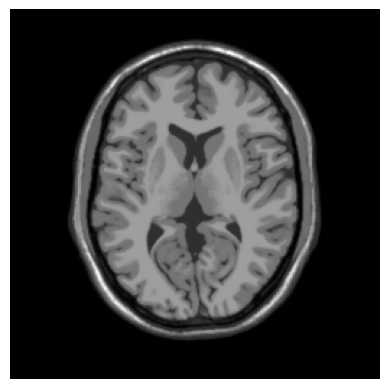

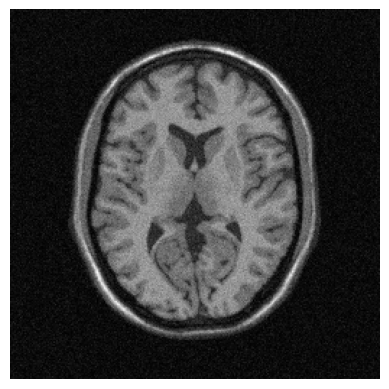

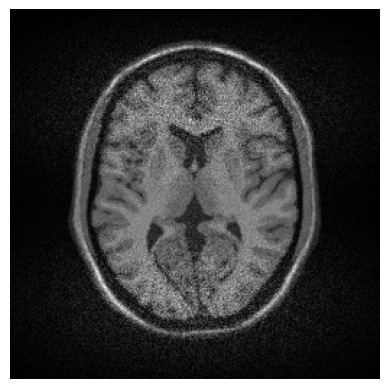

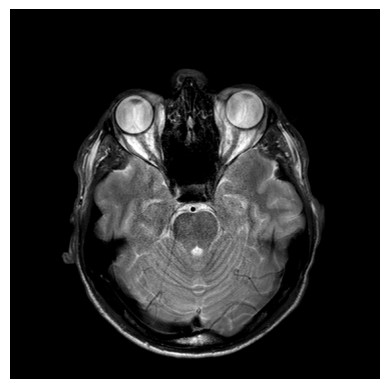

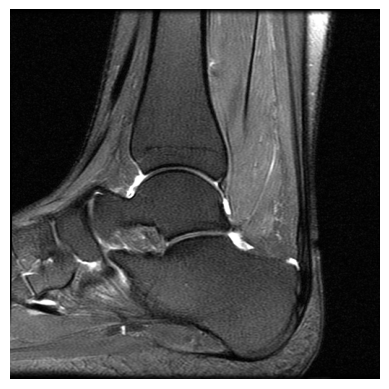

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.io import loadmat
import math
import os

if not os.path.exists("MR_data.mat") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/07_Bilateral/MR_data.mat --no-check-certificate

mat = loadmat("MR_data.mat")

names = ["I_noisefree", "I_noisy1", "I_noisy2","I_noisy3","I_noisy4"]

for i in range(len(names)):
    fig, ax = plt.subplots()
    ax.imshow(mat[names[i]], cmap="gray")
    ax.axis('off')



### "Klasyczna" konwolucja

1. Zdefiniuj parametry filtra Gaussowskiego: rozmiar okna i wariancję $\delta_S$.
2. Oblicz współczynniki filtra na podstawie zdefiniowanych parametrów (najprościej w ramach podwójnej pętli for).
2. Sprawdź ich poprawność i zwizualizuj filtr (tak jak w ćwiczeniu pt. "Przetwarzanie wstępne. Filtracja kontekstowa.").
3. Wykonaj kopię obrazu wejściowego: `IConv = Input.copy()`
4. Wykonaj podwójną pętlę po obrazie. Pomiń ramkę, dla której nie jest zdefiniowany kontekst o wybranej wielkości.
5. W każdej iteracji stwórz dwuwymiarową tablicę zawierającą aktualny kontekst.
6. Napisz funkcję, która będzie obliczała nową wartość piksela.
Argumentem tej funkcji są aktualnie przetwarzane okno i współczynniki filtra.
7. Obliczoną wartość przypisz do odpowiedniego piksela kopii obrazu wejściowego.
8. Wyświetl wynik filtracji.
9. Porównaj wynik z obrazem oryginalnym.

In [ ]:
def gaussian_convolution(image, window_size, variance):
    image_out = image.copy()

    y_size, x_size = image_out.shape

    for i in range(window_size//2, y_size - window_size//2):
        for j in range(window_size//2, x_size - window_size//2):
            i1 = i - window_size//2
            j1 = j - window_size//2
            i2 = i + window_size//2 + window_size%2
            j2 = j + window_size//2 + window_size%2

            window = image[i1:i2, j1:j2]

            image_out[i, j] = pixel_value_1(window, variance)

    return image_out

def pixel_value_1(window, variance):
    val = 0
    mask = np.zeros_like(window)
    middle_y = window.shape[0]//2
    middle_x = window.shape[1]//2
    for k in range(window.shape[0]):
        for l in range(window.shape[1]):
            y = np.sqrt((middle_y-k)**2 + (middle_x-l)**2)
            mask[k][l] = np.exp(-y**2/(2*variance))
            val += window[k][l] * mask[k][l]
    val = (1/mask.sum()) * val
    return val

window_size = 5
variance = 5

names = ["I_noisefree", "I_noisy1", "I_noisy2","I_noisy3","I_noisy4"]

filtered_gauss = []
a = 6

for i in range(len(names)):
    I = mat[names[i]]

    filtered = gaussian_convolution(I, window_size, variance)
    filtered_gauss.append(filtered)

    fig, ax = plt.subplots(1, 2, figsize=(2*a, a))
    ax[0].imshow(I, cmap="gray")
    ax[0].axis('off')
    ax[0].set_title("Original")

    ax[1].imshow(filtered, cmap="gray")
    ax[1].axis('off')
    ax[1].set_title("Filtered")


### Filtracja bilateralna

1. Zdefiniuj dodatkowy parametr: wariancję $\delta_R$.
3. Wykonaj kopię obrazu wejściowego: `IBilateral = Input.copy()`
4. Wykonaj podwójną pętlę po obrazie. Pomiń ramkę, dla której nie jest zdefiniowany kontekst o wybranej wielkości.
5. W każdej iteracji stwórz dwuwymiarową tablicę zawierającą aktualny kontekst.
6. Napisz funkcję, która będzie obliczała nową wartość piksela.
Argumentami funkcji są aktualnie przetwarzane okno, współczynniki filtra gaussowskiego (takie same jak wcześniej) i wariancja $\delta_R$.
7. Oblicz odległość w przeciwdziedzinie (dla wartości pikseli).
8. Oblicz funkcję Gaussa dla obliczonych odległości z zadanym parametrem.
9. Wykonaj normalizację obliczonych współczynników.
10. Obliczoną wartość przypisz do odpowiedniego piksela kopii obrazu wejściowego.
11. Wyświetl wynik filtracji.
12. Porównaj wynik z obrazem oryginalnym.

In [ ]:
def bilateral(image, window_size, variance_g, variance_r):
    image_out = image.copy()

    y_size, x_size = image_out.shape

    for i in range(window_size//2, y_size - window_size//2):
        for j in range(window_size//2, x_size - window_size//2):
            i1 = i - window_size//2
            j1 = j - window_size//2
            i2 = i + window_size//2 + window_size%2
            j2 = j + window_size//2 + window_size%2

            window = image[i1:i2, j1:j2]

            image_out[i, j] = pixel_value_2(window, variance_g, variance_r)

    return image_out

def pixel_value_2(window, variance_g, variance_r):
    val = 0
    middle_y = window.shape[0]//2
    middle_x = window.shape[1]//2
    mask = np.zeros_like(window)
    for k in range(window.shape[0]):
        for l in range(window.shape[1]):
            y = np.sqrt((middle_y-k)**2 + (middle_x-l)**2)
            gauss = np.exp(-y**2/(2*variance_g))

            diff = abs(np.int32(window[k][l]) - np.int32(window[middle_y][middle_x]))
            mask[k][l] = gauss * gamma(diff, variance_r)

            val += window[k][l] * mask[k][l]
    val = (1/mask.sum()) * val
    return val

def gamma(y, variance_r):
    y = np.float64(y)
    return np.exp(-(y**2)/(2*(variance_r**2)))

window_size = 5
variance = 5
variance_r = 70

names = ["I_noisefree", "I_noisy1", "I_noisy2","I_noisy3","I_noisy4"]

a = 6

for i in range(len(names)):
    I = mat[names[i]]

    filtered = bilateral(I, window_size, variance, variance_r)

    fig, ax = plt.subplots(1, 3, figsize=(3*a, a))
    ax[0].imshow(I, cmap="gray")
    ax[0].axis('off')
    ax[0].set_title("Original")

    ax[1].imshow(filtered_gauss[i], cmap="gray")
    ax[1].axis('off')
    ax[1].set_title("Filtered gaussian")

    ax[2].imshow(filtered, cmap="gray")
    ax[2].axis('off')
    ax[2].set_title("Filtered bilateral")